In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
data_dir = "crop-disease-data"

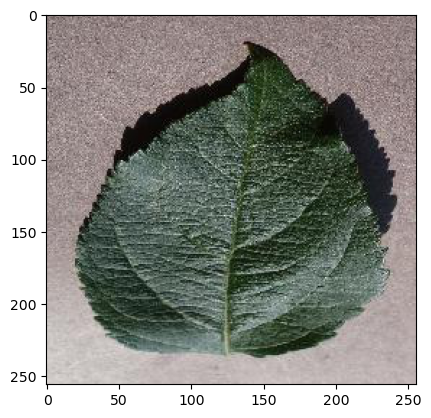

In [5]:
import matplotlib.image as mping
test_image = "crop-disease-data/healthy/1.jpg"
img = mping.imread(test_image)
plt.imshow(img)

In [6]:
# define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 132,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 1709 files belonging to 2 classes.
Using 1368 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 132,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 1709 files belonging to 2 classes.
Using 341 files for validation.


In [9]:
class_names = train_ds.class_names
class_names

['diseased', 'healthy']

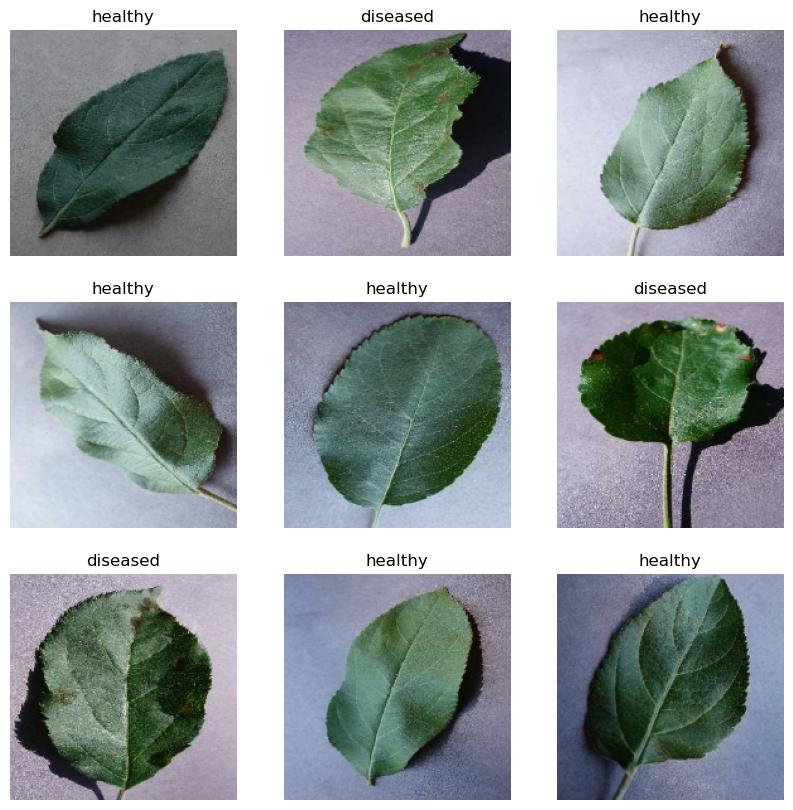

In [11]:
# Here are the first nine images from my training dataset
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [12]:
# manually iterate of the dataset and retrieve batches of images
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [13]:
# configure the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Standardize values to be in the [0,1] RGB channel range by using tf.keras.Rescaling
normalization_layers = layers.Rescaling(1./255)

In [16]:
# create a keras model

num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [17]:
# compile our model

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [36]:
model.fit(x=tf_img_data, y=tf.cast(list(map(int, target_val)), tf.int32), epochs=5)

Epoch 1/5
54/54 [==============================] - 33s 597ms/step - loss: 7.6173 - accuracy: 0.5219
Epoch 2/5
54/54 [==============================] - 32s 598ms/step - loss: 7.5922 - accuracy: 0.5290
Epoch 3/5
54/54 [==============================] - 34s 631ms/step - loss: 7.5922 - accuracy: 0.5290
Epoch 4/5
54/54 [==============================] - 30s 552ms/step - loss: 7.5922 - accuracy: 0.5290
Epoch 5/5
54/54 [==============================] - 30s 559ms/step - loss: 7.5922 - accuracy: 0.5290
